# Experiment: Random, Halton, State-Lattice
Experiment comparing random (i.e., i.i.d.) sampling, Halton sampling and (determinstic) state-lattice planning.

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from mpb import MPB, MultipleMPB
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42
from copy import deepcopy

In [2]:
mpb = MPB()
mpb.set_planners(['prm_star'])
mpb.set_steer_functions(['reeds_shepp'])
mpb.set_corridor_grid_env(radius=3.0)
mpb["ompl.seed"] = 1
mpb["ompl.cost_threshold"] = 0
mpb["max_planning_time"] = 0.3
mpb["env.collision.collision_model"] = 1

mpb_iid = deepcopy(mpb)
mpb_iid.set_id('iid')
mpb_iid["ompl.sampler"] = "iid"

mpb_halton = deepcopy(mpb)
mpb_halton.set_id('halton')
mpb_halton["ompl.sampler"] = "halton"

mpb_statelattice = deepcopy(mpb)
mpb_statelattice.set_id('sbpl_arastar')
mpb_statelattice.set_planners(['sbpl_arastar'])
mpb_statelattice["sbpl.scaling"] = 1
mpb_statelattice["sbpl.resolution"] = 0.25
mpb_statelattice["max_planning_time"] = 1

pool = MultipleMPB()
pool.benchmarks.append(mpb_iid)
pool.benchmarks.append(mpb_halton)
pool.benchmarks.append(mpb_statelattice)
pool.run_parallel(runs=100, id='experiment_random_halton_lattice', show_plot=False)
pool.merge('experiment_random_halton_lattice/experiment_random_halton_lattice.json', plan_names=['PRM* (iid)', 'PRM* (Halton)', 'SL (ARA*)'])

Available memory: 11.54 GB, limiting each MPB process to 62.5% usage (7.21 GB).
Creating pool of 3 processes.
Running MPB with ID halton (log file at experiment_random_halton_lattice/halton.log)...
Running MPB with ID sbpl_arastar (log file at experiment_random_halton_lattice/sbpl_arastar.log)...
Running MPB with ID iid (log file at experiment_random_halton_lattice/iid.log)...



Benchmark 2 (sbpl_arastar) finished successfully.

Benchmark 1 (halton) finished successfully.

Benchmark 0 (iid) finished successfully.
All benchmarks succeeded.
Successfully merged [experiment_random_halton_lattice/iid_results.json, experiment_random_halton_lattice/halton_results.json, experiment_random_halton_lattice/sbpl_arastar_results.json] into experiment_random_halton_lattice/experiment_random_halton_lattice.json.


In [ ]:
from trajectory import visualize
visualize('experiment_random_halton_lattice/experiment_random_halton_lattice.json', draw_cusps=True)

Visualizing experiment_random_halton_lattice/experiment_random_halton_lattice.json...
Saved ./sampling.pdf.


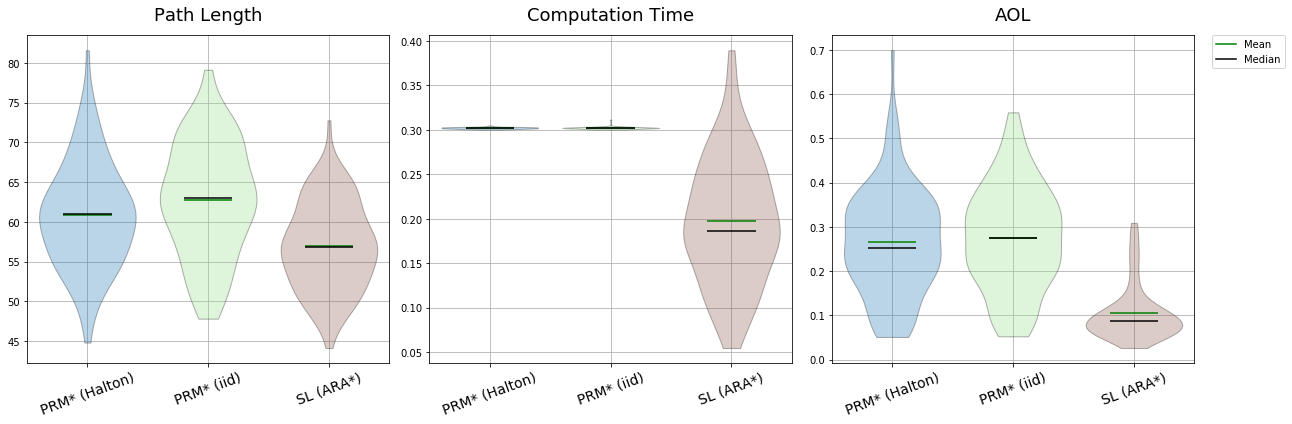

In [7]:
from plot_stats import plot_planner_stats

plot_planner_stats('experiment_random_halton_lattice/experiment_random_halton_lattice.json', metrics='path_length,planning_time,aol', save_file='./sampling.pdf', num_colors=4, ticks_rotation=20)